In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import datetime
import timeit

2023-08-06 10:20:27.652042: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-06 10:20:27.716934: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-06 10:20:27.718255: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-06 10:20:34.697377: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.13.0


In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [4]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
test_images.shape

(10000, 28, 28)

In [7]:
len(train_labels)

60000

In [8]:
len(test_labels)

10000

In [9]:
train_images[0].shape

(28, 28)

In [10]:
train_images[0][0].shape

(28,)

In [11]:
train_images[0][0][0].shape

()

In [12]:
abc = [[[1, 2], [3, 4], [5, 6]], [[7, 8], [9, 10], [11, 12]]]

In [13]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [14]:
fashion_mnist_log_dir = "logs/fashion-mnist/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=fashion_mnist_log_dir, histogram_freq=1)

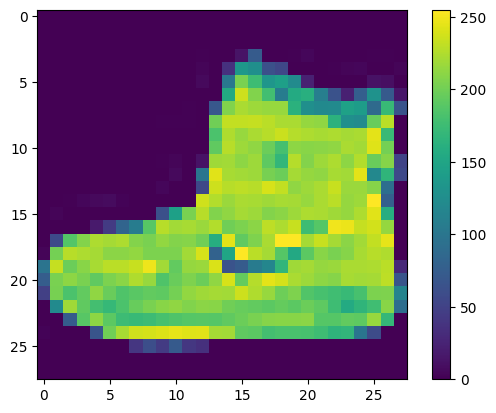

In [15]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [16]:
train_images = train_images / 255.0
test_images = test_images / 255.0

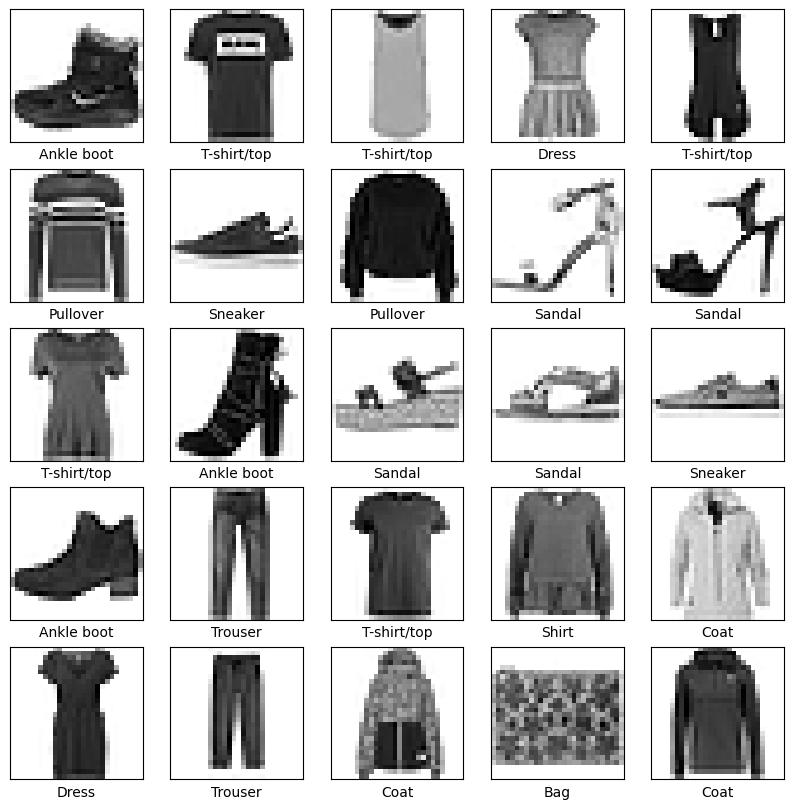

In [17]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [18]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [19]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [20]:
#model.fit(train_images, train_labels, epochs=10)
model.fit(x=train_images, 
          y=train_labels, 
          epochs=10, 
          validation_data=(test_images, test_labels), 
          callbacks=[tensorboard_callback])

2023-08-06 10:20:56.358048: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/10
1865/1875 [============================>.] - ETA: 0s - loss: 0.5012 - accuracy: 0.8246

2023-08-06 10:21:10.083835: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.
2023-08-06 10:21:11.476948: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 24084480 exceeds 10% of free system memory.


1875/1875 [==============================] - 13s 5ms/step - loss: 0.5007 - accuracy: 0.8248 - val_loss: 0.4376 - val_accuracy: 0.8395
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3783 - accuracy: 0.8642 - val_loss: 0.3899 - val_accuracy: 0.8633
Epoch 3/10
  22/1875 [..............................] - ETA: 8s - loss: 0.3489 - accuracy: 0.8764

2023-08-06 10:21:21.261269: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 24084480 exceeds 10% of free system memory.


1875/1875 [==============================] - 8s 4ms/step - loss: 0.3390 - accuracy: 0.8766 - val_loss: 0.3597 - val_accuracy: 0.8726
Epoch 4/10
  21/1875 [..............................] - ETA: 9s - loss: 0.2791 - accuracy: 0.8839

2023-08-06 10:21:29.584565: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 24084480 exceeds 10% of free system memory.


1875/1875 [==============================] - 8s 4ms/step - loss: 0.3143 - accuracy: 0.8848 - val_loss: 0.3535 - val_accuracy: 0.8732
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2961 - accuracy: 0.8907 - val_loss: 0.3496 - val_accuracy: 0.8701
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2803 - accuracy: 0.8964 - val_loss: 0.3366 - val_accuracy: 0.8779
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2689 - accuracy: 0.8996 - val_loss: 0.3429 - val_accuracy: 0.8789
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2595 - accuracy: 0.9046 - val_loss: 0.3336 - val_accuracy: 0.8794
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2496 - accuracy: 0.9066 - val_loss: 0.3298 - val_accuracy: 0.8826
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2407 - accuracy: 0.9089 - val_loss: 0.3490 - val_accuracy: 0.8739


In [21]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3490 - accuracy: 0.8739 - 473ms/epoch - 2ms/step

Test accuracy: 0.8738999962806702


In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
models_dir = r'./fashion-models'
if not os.path.exists(models_dir):
    os.makedirs(models_dir)

In [24]:
model.save(models_dir + '/fashion_mnist_model')

INFO:tensorflow:Assets written to: ./fashion-models/fashion_mnist_model/assets


INFO:tensorflow:Assets written to: ./fashion-models/fashion_mnist_model/assets


In [25]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [26]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [27]:
predictions[0]

array([6.0231223e-08, 8.7603782e-09, 1.3621937e-08, 1.3231918e-13,
       2.2231742e-08, 2.9783302e-03, 4.2339641e-07, 3.1236380e-03,
       2.1406896e-09, 9.9389744e-01], dtype=float32)

In [28]:
np.argmax(predictions[0])

9

In [29]:
test_labels[0]

9

In [30]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


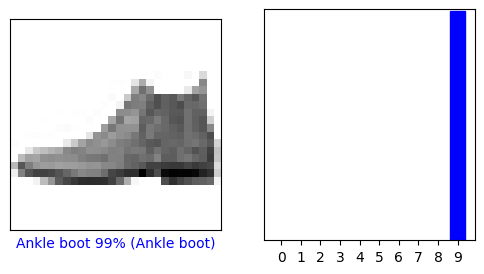

In [31]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

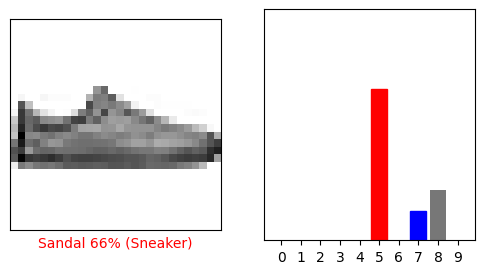

In [32]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

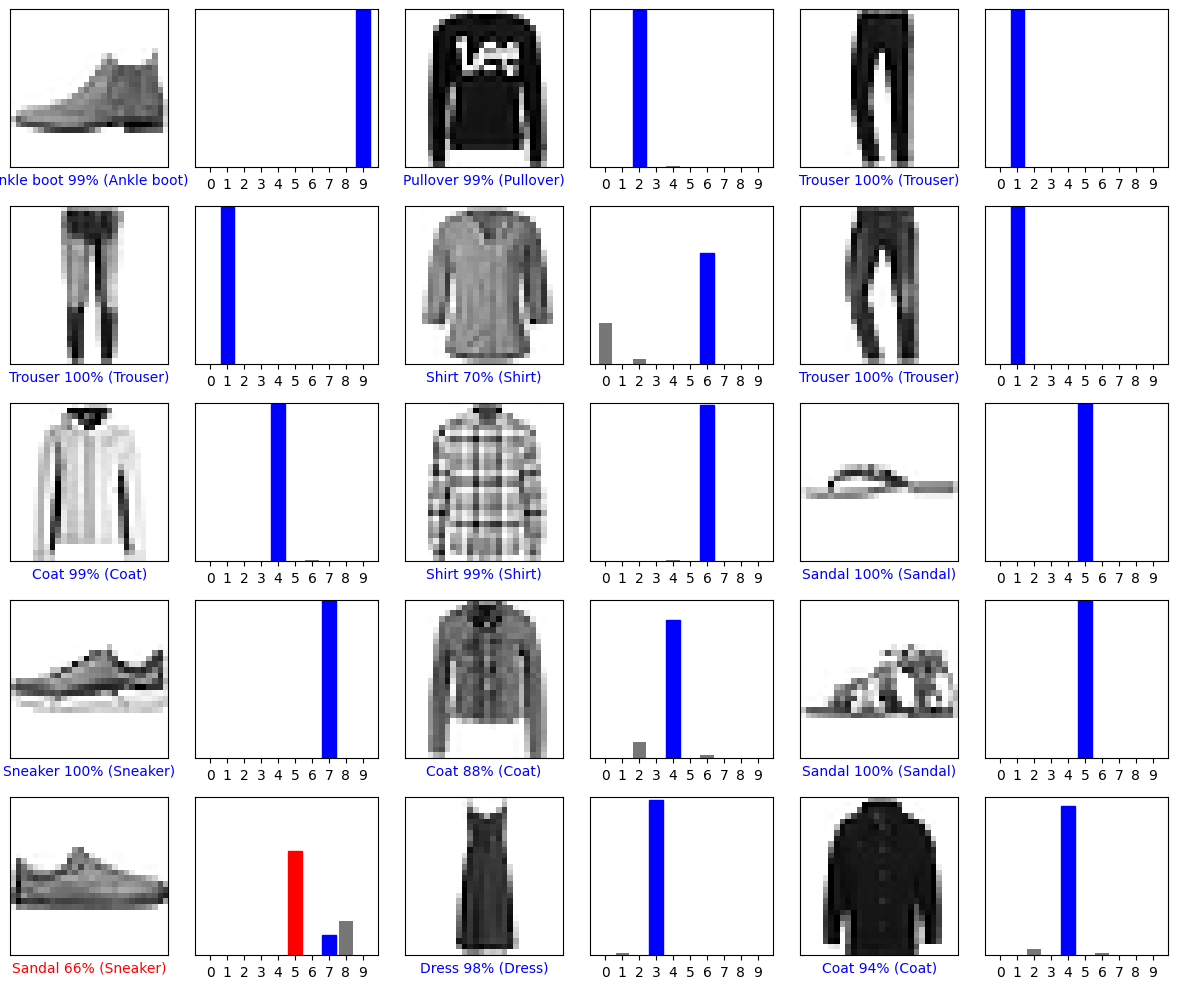

In [33]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()


In [34]:
img = test_images[1]
print(img.shape)

(28, 28)


In [35]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [36]:
predictions_single = probability_model.predict(img)
print(predictions_single)

1/1 [==============================] - 0s 20ms/step
[[8.2254019e-06 4.6277097e-12 9.9183005e-01 1.9326855e-08 6.7010135e-03
  7.1514281e-11 1.4606937e-03 4.5337904e-19 7.0650784e-11 5.7369067e-14]]


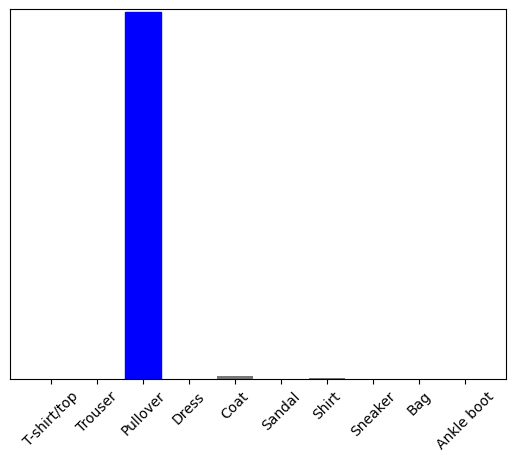

In [37]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [38]:
np.argmax(predictions_single[0])

2

In [39]:
%load_ext tensorboard

In [41]:
%tensorboard --logdir logs/fashion-mnist/fit

ERROR: Failed to launch TensorBoard (exited with 1).
Contents of stderr:
2023-08-06 10:24:18.347633: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-06 10:24:18.393873: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-06 10:24:18.394295: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-06 10:24:25.098756: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

Address already in use
Po